<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/LoanTap_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

# Import required Libraries

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import datetime

In [ ]:
!pip install simple_colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simple_colors import *

# Load the Dataset

In [ ]:
# Load the dataset
data_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

# Statistical Summary of the Dataset

In [ ]:
# Meta data of dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
# Description of the dataset
data_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
data_df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [ ]:
# Shape of the dataset
print("Given dataset contains {0} Rows and {1} Columns ".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 396030 Rows and 27 Columns 


In [ ]:
# Unique value counts
data_df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [ ]:
# Value types and their unique counts of Categorical Variables
for col in data_df.astype('object').columns:
  if len(data_df[col].value_counts())<10:
    print(blue(col, ['bold']))
    print(data_df[col].value_counts().to_string(),'\n')

term
 36 months    302005
 60 months     94025 

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054 

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3 

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082 

loan_status
Fully Paid     318357
Charged Off     77673 

initial_list_status
f    238066
w    157964 

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286 

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2 



#### **Observations**: 
*   Loan Term 36 months is more predominant than 60 months
*   Grade B and C has more counts than other grades
*   In terms of Ownership, 'Mortgage' tops the list
*   3/4th of the Customers have fully paid back the loan
*   "Individual" seems to be the popular amongst the application type  




In [ ]:
data_df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [ ]:
# Top 5 Rows
data_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Data Pre-Processing and Data Engineering

### Missing Values check

In [ ]:
# Method to check for Missing Values
def check_for_missing_values(df):
  output = df.columns[df.isna().any()]
  if output.size>0:
    print(blue("Following Columns have Missing Values \n",['bold']))
    print(blue("Column_Name \t Missing_Values_Count \t Percentage"))
    for col in df.columns:
      if df[col].isna().sum()!=0:
        print(col, " \t\t ", df[col].isna().sum(), " \t\t ", round(df[col].isnull().sum()/len(df.index)*100, 2))
  else:
    print("Given dataset doesn't have any missing values")
    print(df.isna().sum())

In [ ]:
check_for_missing_values(data_df)

Following Columns have Missing Values 

Column_Name 	 Missing_Values_Count 	 Percentage
emp_title  		  22927  		  5.79
emp_length  		  18301  		  4.62
title  		  1755  		  0.44
revol_util  		  276  		  0.07
mort_acc  		  37795  		  9.54
pub_rec_bankruptcies  		  535  		  0.14


#### **Observation**: 
*   Clearly 'emp_title', 'emp_length' and 'mort_acc' have significant null values. Remaining features have negligible null values which can be dropped.
*   Null values in 'emp_title' can be filled with 'Unknown title'
*   Null values in 'emp_length' can be imputed with mean value
*   'mort_acc' is number of mortgage accounts. We have to impute it with median to it's null values

In [ ]:
# Take a working copy of the dataset
work_df = data_df.copy()

In [ ]:
check_for_missing_values(work_df)

Following Columns have Missing Values 

Column_Name 	 Missing_Values_Count 	 Percentage
emp_title  		  22927  		  5.79
emp_length  		  18301  		  4.62
title  		  1755  		  0.44
revol_util  		  276  		  0.07
mort_acc  		  37795  		  9.54
pub_rec_bankruptcies  		  535  		  0.14


In [ ]:
# Imputing missing values of 'emp_title' with 'unknown_title'
work_df['emp_title'].fillna('unknown_title', inplace=True)

In [ ]:
# Imputing null values of 'emp_length' with forward fill method
work_df['emp_length'] = work_df['emp_length'].fillna(method='ffill')

In [ ]:
# Filling null values of 'mort_acc' with median value of 'mort_acc'
work_df['mort_acc'].fillna(work_df['mort_acc'].median(), inplace=True)

In [ ]:
check_for_missing_values(work_df)

Following Columns have Missing Values 

Column_Name 	 Missing_Values_Count 	 Percentage
title  		  1755  		  0.44
revol_util  		  276  		  0.07
pub_rec_bankruptcies  		  535  		  0.14


In [ ]:
# As the above columns have compartively less null values, these can be dropped. 
work_df = work_df.dropna()

In [ ]:
check_for_missing_values(work_df)

Given dataset doesn't have any missing values
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64


In [ ]:
# Check for duplicates
dup_rows = work_df[work_df.duplicated()]
print(blue("# of duplicate rows: {0} ".format(dup_rows.shape[0])))

# of duplicate rows: 0 


In [ ]:
work_df['emp_length'].value_counts()

10+ years    131320
2 years       37294
< 1 year      33030
3 years       32987
5 years       27662
1 year        26856
4 years       24908
7 years       21766
6 years       21698
8 years       19979
9 years       15965
Name: emp_length, dtype: int64

In [ ]:
# Convert the emp_length to a numerical column
# Before converting the datatype, let's make <1 yrs as 0 years and 10+ yrs to 10 years
work_df['emp_length'] = work_df['emp_length'].replace(['< 1 year'], '0 year')
work_df['emp_length'] = work_df['emp_length'].replace(['10+ years'], '10 years')

In [ ]:
work_df['emp_length'].value_counts()

10 years    131320
2 years      37294
0 year       33030
3 years      32987
5 years      27662
1 year       26856
4 years      24908
7 years      21766
6 years      21698
8 years      19979
9 years      15965
Name: emp_length, dtype: int64

In [ ]:
work_df[['emp_duration', 'emp_years']] = work_df['emp_length'].str.split(' ', expand=True)

In [ ]:
work_df.drop(['emp_length', 'emp_years'], axis='columns', inplace=True)

In [ ]:
work_df['emp_duration'].value_counts()

10    131320
2      37294
0      33030
3      32987
5      27662
1      26856
4      24908
7      21766
6      21698
8      19979
9      15965
Name: emp_duration, dtype: int64

In [ ]:
work_df['emp_duration'] = work_df['emp_duration'].astype(int)

In [ ]:
work_df.describe(include='object').T

,count,unique,top,freq
term,393465,2,36 months,300024
grade,393465,7,B,115395
sub_grade,393465,35,B3,26518
emp_title,393465,172227,unknown_title,22668
home_ownership,393465,6,MORTGAGE,197110
verification_status,393465,3,Verified,138867
issue_d,393465,112,Oct-2014,14838
loan_status,393465,2,Fully Paid,316271
purpose,393465,14,debt_consolidation,233108
title,393465,48472,Debt consolidation,152392


In [ ]:
# Let's convert 'issue_dt' and 'earliest_cr_line' into datatime type
work_df['issue_d'] = work_df['issue_d'].astype('datetime64[ns]')
work_df['earliest_cr_line'] = work_df['earliest_cr_line'].astype('datetime64[ns]')

In [ ]:
now = datetime.datetime.now()
work_df['current_date'] = pd.Series([now.date() for x in range(len(work_df.index))])
work_df['current_date'] = work_df['current_date'].astype('datetime64[ns]')
work_df['credit_line_age'] = (work_df['current_date'] - work_df['earliest_cr_line']) / np.timedelta64(1, 'D')
work_df['loan_age'] = (work_df['current_date'] - work_df['issue_d']) / np.timedelta64(1, 'D')
work_df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_duration,current_date,credit_line_age,loan_age
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,2023-01-29,11930.0,2950.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,2023-01-29,6786.0,2950.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,2023-01-29,5660.0,2950.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,2023-01-29,5994.0,3011.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,2023-01-29,8735.0,3590.0


In [ ]:
work_df.drop(['current_date', 'earliest_cr_line', 'issue_d'], axis='columns', inplace=True)

In [ ]:
# Drop the address column as it may not have much significant for our analysis
work_df.drop(['address'], axis='columns', inplace=True)

In [ ]:
# Let's drop the 'title' column as well
work_df.drop(['title'], axis='columns', inplace=True)

In [ ]:
# Segregate Categorical Features
cat_features = list(work_df.select_dtypes('object').columns)
for col in cat_features:
  print('Unique values in {0} are {1}'.format(col, work_df[col].unique()))

Unique values in term are [' 36 months' ' 60 months']
Unique values in grade are ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Unique values in sub_grade are ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
Unique values in emp_title are ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
Unique values in home_ownership are ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE']
Unique values in verification_status are ['Not Verified' 'Source Verified' 'Verified']
Unique values in loan_status are ['Fully Paid' 'Charged Off']
Unique values in purpose are ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
Unique values in initial_list_status are ['w' 'f']
Unique values in application_

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
work_df['term'] = work_df['term'].map(term_values)

In [ ]:
# Sub grade is secondary level categorization of grade, so we can ignore the first part and convert it to int type
work_df['sub_grade'] = work_df['sub_grade'].str[1:]

In [ ]:
work_df['sub_grade'] = work_df['sub_grade'].astype(int)

In [ ]:
# Segregate Numerical Features
num_features = work_df.select_dtypes('number')


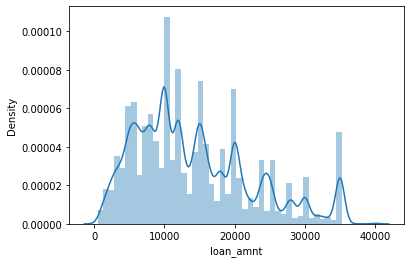

In [ ]:
sns.distplot(work_df['loan_amnt'])

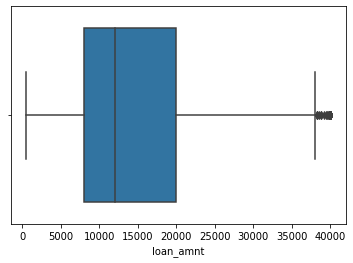

In [ ]:
sns.boxplot(work_df['loan_amnt'])

In [ ]:
# Check for Outliers
num_features.columns

Index(['loan_amnt', 'int_rate', 'installment', 'sub_grade', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'emp_duration', 'credit_line_age',
       'loan_age'],
      dtype='object')

In [ ]:
work_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,393465.0,14117.269960,8353.190693,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,393465.0,13.638728,4.468866,5.32,10.49,13.33,16.49,30.99
installment,393465.0,431.946979,250.582348,16.08,250.33,375.43,567.49,1533.81
sub_grade,393465.0,2.972028,1.406815,1.00,2.00,3.00,4.00,5.00
annual_inc,393465.0,74212.294265,61628.502516,0.00,45000.00,64000.00,90000.00,8706582.00
dti,393465.0,17.383396,18.061993,0.00,11.29,16.91,22.98,9999.00
open_acc,393465.0,11.317601,5.133143,1.00,8.00,10.00,14.00,90.00
pub_rec,393465.0,0.178189,0.530628,0.00,0.00,0.00,0.00,86.00
revol_bal,393465.0,15849.758057,20552.685648,0.00,6042.00,11194.00,19630.00,1743266.00
revol_util,393465.0,53.828586,24.434544,0.00,35.90,54.90,72.90,892.30


#### **Observation**:
The big difference b/w mean and median values indicate the existence of Outliers

In [ ]:
# Outlier detection
def check_outliers(df, col):
  q1 = np.quantile(df[col], 0.25)
  q3 = np.quantile(df[col], 0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  outlier = df.loc[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outlier.shape[0] / df.shape[0]*100

In [ ]:
# Store outliers
outliers_list = []
def print_outliers():
  cols = num_features.columns
  for i, j in enumerate(cols):
    print(f"{j} = {round(check_outliers(work_df, j),2)}%")
    if check_outliers(work_df, j) > 0:
      outliers_list.append(j)


In [ ]:
# print outlier percentages
print_outliers()

loan_amnt = 0.05%
int_rate = 0.94%
installment = 2.83%
sub_grade = 0.0%
annual_inc = 4.21%
dti = 0.07%
open_acc = 2.6%
pub_rec = 14.59%
revol_bal = 5.36%
revol_util = 0.0%
total_acc = 2.15%
mort_acc = 1.73%
pub_rec_bankruptcies = 11.4%
emp_duration = 0.0%
credit_line_age = 0.0%
loan_age = 0.0%


In [ ]:
# List of features that have outliers
outliers_list

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
#Removing outliers
# outliers_removed_df = data_df.copy()
def remove_outliers(df, col):
  q1=df[col].quantile(.25)
  q3=df[col].quantile(.75)
  iqr=q3-q1
  outliers_removed_df=df[(df[col]>q1-1.5*iqr)&(df[col]<q3+1.5*iqr)]
  return outliers_removed_df

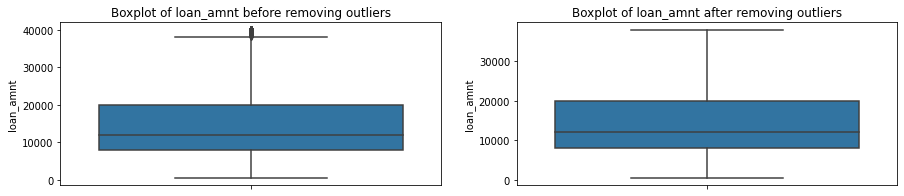

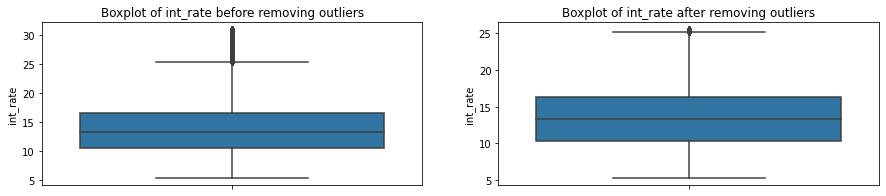

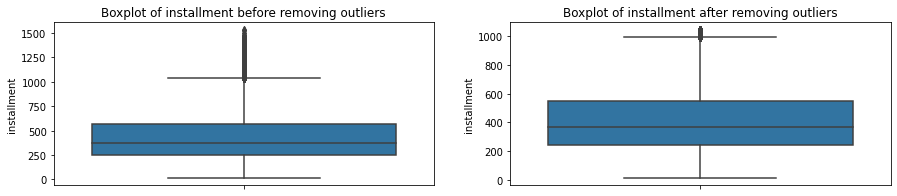

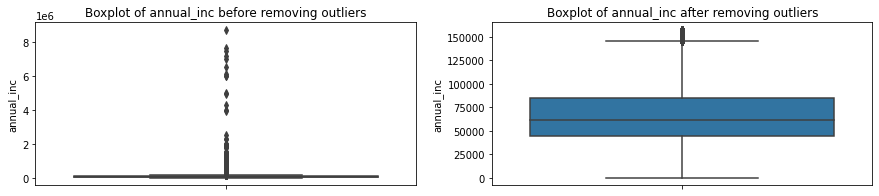

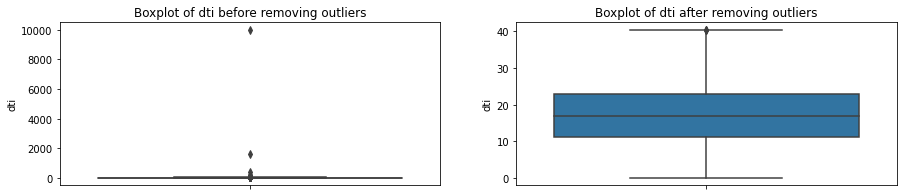

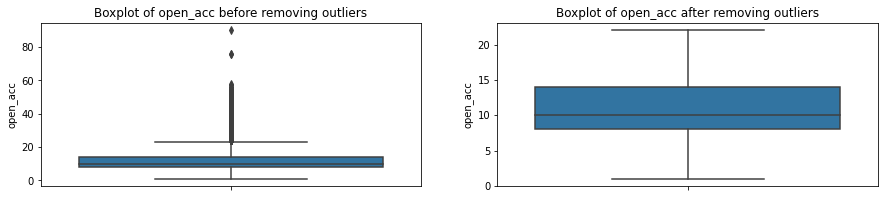

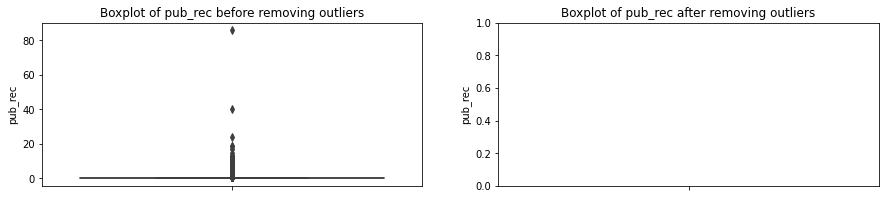

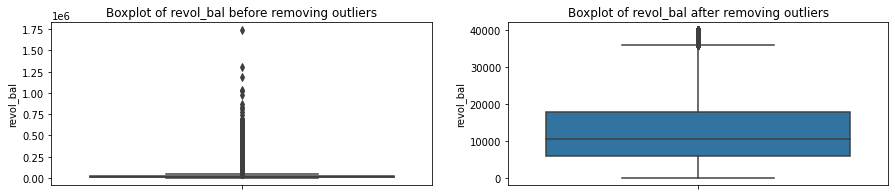

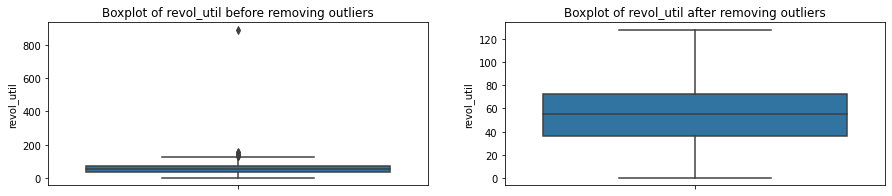

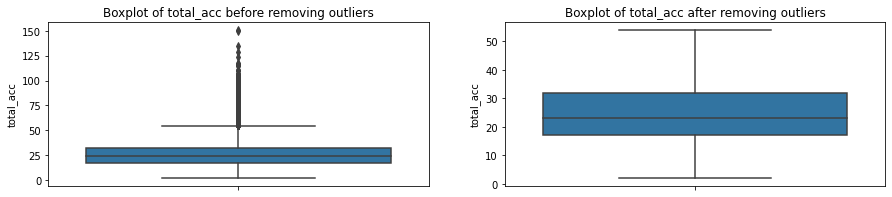

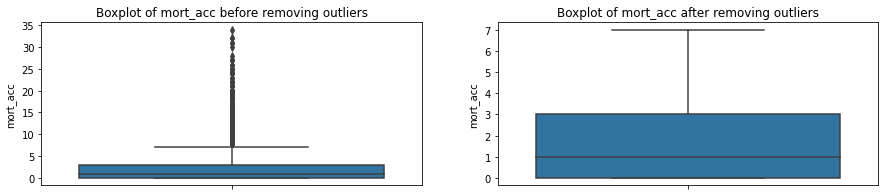

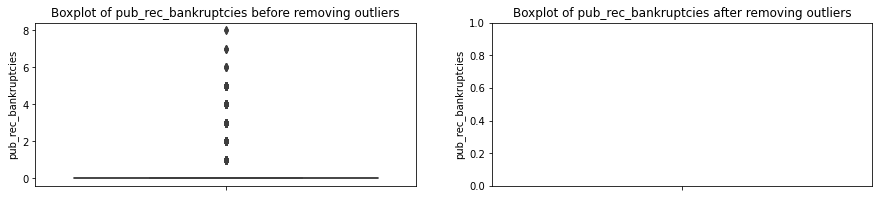

In [ ]:
for col in outliers_list:
  plt.figure(figsize=(15, 3))
  plt.subplot(121)
  sns.boxplot(y=work_df[col])
  plt.title(f"Boxplot of {col} before removing outliers")
  plt.subplot(122)
  new_df = remove_outliers(work_df, col)
  sns.boxplot(y=new_df[col])
  plt.title(f"Boxplot of {col} after removing outliers")

  plt.show()

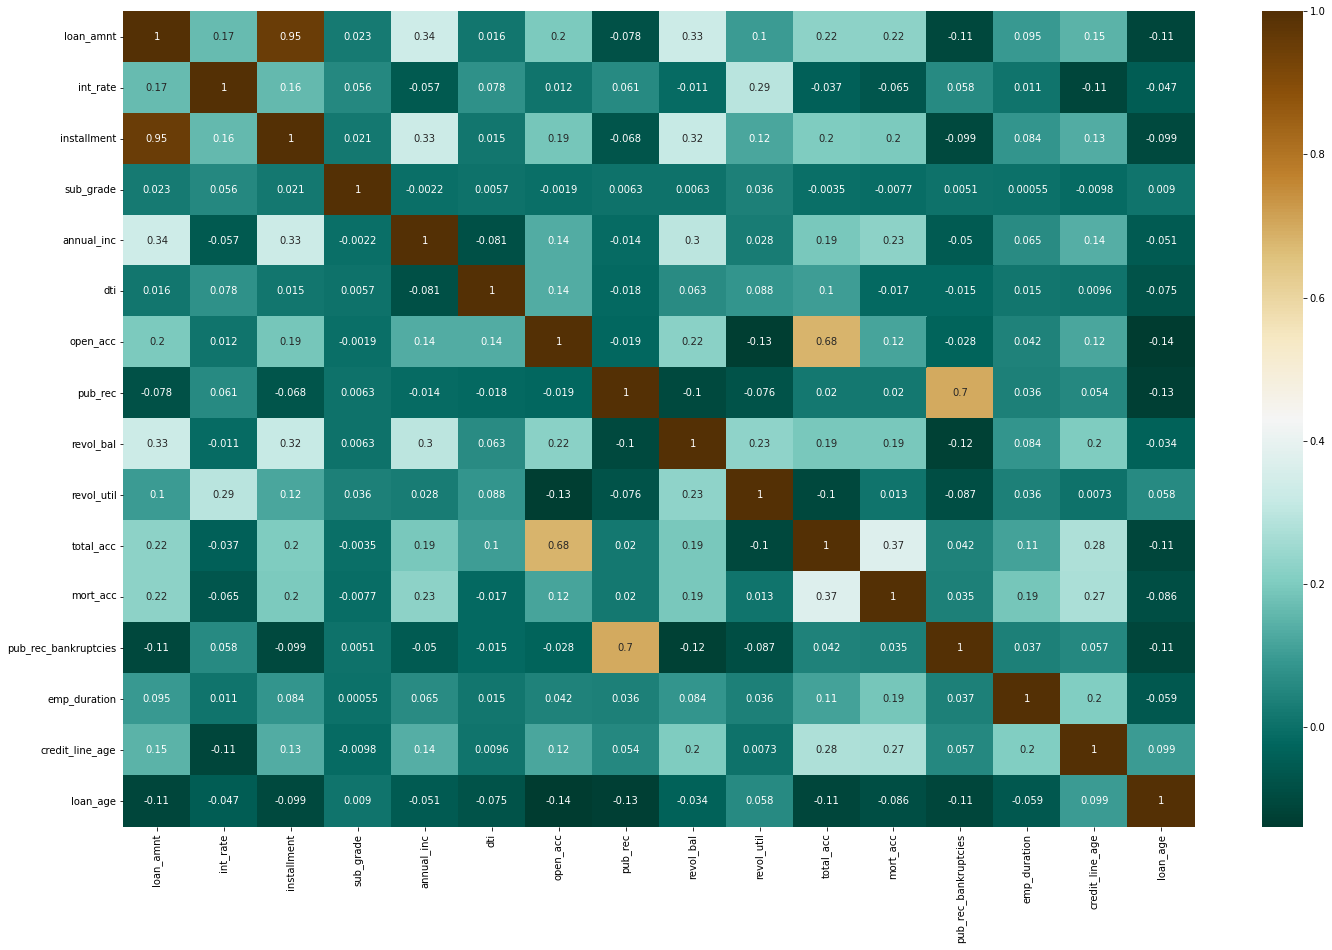

In [ ]:
# Correlation check
plt.figure(figsize=(24,15))
sns.heatmap(work_df.corr(),annot=True,cmap='BrBG_r')

plt.show()

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.9 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
TE = TargetEncoder()

In [ ]:
# Split the Independent (Input) & Dependent (Target) Variables
X = work_df.drop(['loan_status'], axis=1)
y = work_df['loan_status']

In [ ]:
work_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'emp_duration', 'credit_line_age',
       'loan_age'],
      dtype='object')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
work_df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [ ]:
target_enc = ["grade", 'emp_title', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']

In [ ]:
for col in target_enc:
    from category_encoders import TargetEncoder
    TEncoder = TargetEncoder()
    
    work_df[col] = TEncoder.fit_transform(work_df[col],work_df["loan_status"])

In [ ]:
# Get the Train-Test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Logistic Regression on non-standardized data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_Model = LogisticRegression(class_weight="Auto")

In [ ]:
LogisticRegression(class_weight="Auto")

LogisticRegression(class_weight='Auto')

In [ ]:
LR_Model.fit(X_train, y_train)

ValueError: ignored